# Getting Started with Grid Status API

This notebook demonstrates how to use the Grid Status API to retrieve and visualize data about electricity grid datasets.

For more information about the API, please visit: https://www.gridstatus.io/api

To retrieve your API key, create a Grid Status account and go to the [settings page](https://www.gridstatus.io/settings/api) to get your API key.

## Installation

To run this notebook, install the gridstatusio package with notebook dependencies:

```bash
uv pip install gridstatusio[notebooks]
```

This repository will have the latest version of the client and all the dependencies you need to run the example notebooks. Be sure to check out the [README](../README.md) for more information on how to get set up.

In [1]:
from gridstatusio import GridStatusClient

## Setting up the API client

First, we need to set up the GridStatusClient by providing our API key. You can either set the API key using the `GRIDSTATUS_API_KEY` environment variable or pass it to the constructor directly.

In [2]:
# client = GridStatusClient(api_key="YOUR_API_KEY_HERE")
client = GridStatusClient()

GridStatusClient(host=https://api.gridstatus.io/v1)

## Retrieving data from a dataset

You can retrieve data from a dataset by specifying its ID and the date range. Check out the [Data Catalog](https://www.gridstatus.io/datasets) for all Grid Status datasets accessible through the API. 
By default, the data is returned in UTC. 

*NOTE: Make sure to always set a `limit` for your queries to avoid exceeding the monthly row limit for your API key*

In [3]:
QUERY_LIMIT = 10_000

10000

In [4]:
data_utc = client.get_dataset(
    dataset="ercot_spp_day_ahead_hourly",
    start="2023-04-01",
    end="2023-04-03",
    limit=QUERY_LIMIT,
)

data_utc

2026-01-10 19:43:50 - INFO - Fetching Page 1...
2026-01-10 19:43:50 - INFO - GET https://api.gridstatus.io/v1/datasets/ercot_spp_day_ahead_hourly/query
2026-01-10 19:43:50 - INFO - Params: {'start_time': Timestamp('2023-04-01 00:00:00'), 'end_time': Timestamp('2023-04-03 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': None, 'resample_by': None, 'resample_function': None, 'publish_time': None, 'timezone': None, 'cursor': '', 'filter_column': None, 'filter_value': None, 'filter_operator': '=', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2026-01-10 19:43:50 - INFO - Done in 0.25 seconds. 
2026-01-10 19:43:50 - INFO - Total rows: 10,000/10,000 (100.0% of limit)
2026-01-10 19:43:50 - INFO - Total number of rows: 10000


,interval_start_utc,interval_end_utc,location,location_type,market,spp
0,2023-04-01 00:00:00+00:00,2023-04-01 01:00:00+00:00,AEEC,Resource Node,DAY_AHEAD_HOURLY,-21.7800
1,2023-04-01 00:00:00+00:00,2023-04-01 01:00:00+00:00,AGUAYO_UNIT1,Resource Node,DAY_AHEAD_HOURLY,37.3000
2,2023-04-01 00:00:00+00:00,2023-04-01 01:00:00+00:00,AJAXWIND_RN,Resource Node,DAY_AHEAD_HOURLY,25.7600
3,2023-04-01 00:00:00+00:00,2023-04-01 01:00:00+00:00,ALGOD_ALL_RN,Resource Node,DAY_AHEAD_HOURLY,52.9000
4,2023-04-01 00:00:00+00:00,2023-04-01 01:00:00+00:00,ALVIN_RN,Resource Node,DAY_AHEAD_HOURLY,46.1100
...,...,...,...,...,...,...
9995,2023-04-01 12:00:00+00:00,2023-04-01 13:00:00+00:00,BTE_PUN1,Resource Node,DAY_AHEAD_HOURLY,21.3500
9996,2023-04-01 12:00:00+00:00,2023-04-01 13:00:00+00:00,BTE_PUN2,Resource Node,DAY_AHEAD_HOURLY,21.3500
9997,2023-04-01 12:00:00+00:00,2023-04-01 13:00:00+00:00,BTM_ALL,Resource Node,DAY_AHEAD_HOURLY,21.4700
9998,2023-04-01 12:00:00+00:00,2023-04-01 13:00:00+00:00,BUCHAN_ALL,Resource Node,DAY_AHEAD_HOURLY,21.4000


## Return Formats

The client supports three return formats: **pandas DataFrames** (default), **polars DataFrames**, and **Python objects** (list of dictionaries). You can set the format at the client level or override it per-call.

In [5]:
# Pandas format (default) - returns a pandas DataFrame
pandas_data = client.get_dataset(
    dataset="ercot_fuel_mix",
    start="2023-04-01",
    end="2023-04-02",
    limit=5,
    return_format="pandas",
    verbose=False,
)
print(f"Type: {type(pandas_data)}")
pandas_data

Type: <class 'pandas.core.frame.DataFrame'>


,interval_start_utc,interval_end_utc,coal_and_lignite,hydro,nuclear,power_storage,solar,wind,natural_gas,other
0,2023-04-01 00:00:00+00:00,2023-04-01 00:05:00+00:00,6_171.8000,225.0000,3_745.0000,78.8000,1_471.0000,19_551.6000,20_476.6000,0.0000
1,2023-04-01 00:05:00+00:00,2023-04-01 00:10:00+00:00,6_198.6000,225.0000,3_746.0000,208.2000,1_295.6000,19_349.8000,20_475.3000,0.0000
2,2023-04-01 00:10:00+00:00,2023-04-01 00:15:00+00:00,6_142.6000,222.2000,3_746.3000,33.6000,1_143.4000,19_402.3000,20_468.8000,0.0000
3,2023-04-01 00:15:00+00:00,2023-04-01 00:20:00+00:00,6_090.5000,180.5000,3_748.5000,237.2000,1_183.0000,18_926.2000,20_599.9000,0.0000
4,2023-04-01 00:20:00+00:00,2023-04-01 00:25:00+00:00,6_167.6000,222.5000,3_746.6000,186.9000,1_411.1000,18_290.9000,20_961.9000,0.0000


In [6]:
# Polars format - returns a polars DataFrame
polars_data = client.get_dataset(
    dataset="ercot_fuel_mix",
    start="2023-04-01",
    end="2023-04-02",
    limit=5,
    return_format="polars",
    verbose=False,
)
print(f"Type: {type(polars_data)}")
polars_data

Type: <class 'polars.dataframe.frame.DataFrame'>


interval_start_utc,interval_end_utc,coal_and_lignite,hydro,nuclear,power_storage,solar,wind,natural_gas,other
"datetime[μs, UTC]","datetime[μs, UTC]",f64,f64,f64,f64,f64,f64,f64,f64
2023-04-01 00:00:00 UTC,2023-04-01 00:05:00 UTC,6171.8,225.0,3745.0,78.8,1471.0,19551.6,20476.6,0.0
2023-04-01 00:05:00 UTC,2023-04-01 00:10:00 UTC,6198.6,225.0,3746.0,208.2,1295.6,19349.8,20475.3,0.0
2023-04-01 00:10:00 UTC,2023-04-01 00:15:00 UTC,6142.6,222.2,3746.3,33.6,1143.4,19402.3,20468.8,0.0
2023-04-01 00:15:00 UTC,2023-04-01 00:20:00 UTC,6090.5,180.5,3748.5,237.2,1183.0,18926.2,20599.9,0.0
2023-04-01 00:20:00 UTC,2023-04-01 00:25:00 UTC,6167.6,222.5,3746.6,186.9,1411.1,18290.9,20961.9,0.0


In [7]:
# Python format - returns a list of dictionaries (no dependencies required)
python_data = client.get_dataset(
    dataset="ercot_fuel_mix",
    start="2023-04-01",
    end="2023-04-02",
    limit=5,
    return_format="python",
    verbose=False,
)
print(f"Type: {type(python_data)}")
print(f"First row: {python_data[0]}")

Type: <class 'list'>
First row: {'interval_start_utc': datetime.datetime(2023, 4, 1, 0, 0, tzinfo=datetime.timezone.utc), 'interval_end_utc': datetime.datetime(2023, 4, 1, 0, 5, tzinfo=datetime.timezone.utc), 'coal_and_lignite': 6171.8, 'hydro': 225.0, 'nuclear': 3745.0, 'power_storage': 78.8, 'solar': 1471.0, 'wind': 19551.6, 'natural_gas': 20476.6, 'other': 0.0}


## Retrieving data in local time

If you want to retrieve data in local time instead of UTC, you can pass `timezone` to the `get_dataset` method. The resulting data will have `_local` columns in the `timezone` and `_utc` columns in UTC.

In [8]:
data_local = client.get_dataset(
    dataset="ercot_spp_day_ahead_hourly",
    start="2023-04-01",
    end="2023-04-03",
    timezone="market",  # Return timestamps in market time (e.g. Central Time)
    limit=QUERY_LIMIT,
)

data_local

2026-01-10 19:43:55 - INFO - Fetching Page 1...
2026-01-10 19:43:55 - INFO - GET https://api.gridstatus.io/v1/datasets/ercot_spp_day_ahead_hourly/query
2026-01-10 19:43:55 - INFO - Params: {'start_time': Timestamp('2023-04-01 00:00:00'), 'end_time': Timestamp('2023-04-03 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': None, 'resample_by': None, 'resample_function': None, 'publish_time': None, 'timezone': 'market', 'cursor': '', 'filter_column': None, 'filter_value': None, 'filter_operator': '=', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2026-01-10 19:43:56 - INFO - Done in 0.42 seconds. 
2026-01-10 19:43:56 - INFO - Total rows: 10,000/10,000 (100.0% of limit)
2026-01-10 19:43:56 - INFO - Total number of rows: 10000


,interval_start_local,interval_start_utc,interval_end_local,interval_end_utc,location,location_type,market,spp
0,2023-04-01 00:00:00-05:00,2023-04-01 05:00:00+00:00,2023-04-01 01:00:00-05:00,2023-04-01 06:00:00+00:00,AEEC,Resource Node,DAY_AHEAD_HOURLY,-65.2400
1,2023-04-01 00:00:00-05:00,2023-04-01 05:00:00+00:00,2023-04-01 01:00:00-05:00,2023-04-01 06:00:00+00:00,AGUAYO_UNIT1,Resource Node,DAY_AHEAD_HOURLY,20.0900
2,2023-04-01 00:00:00-05:00,2023-04-01 05:00:00+00:00,2023-04-01 01:00:00-05:00,2023-04-01 06:00:00+00:00,AJAXWIND_RN,Resource Node,DAY_AHEAD_HOURLY,7.6500
3,2023-04-01 00:00:00-05:00,2023-04-01 05:00:00+00:00,2023-04-01 01:00:00-05:00,2023-04-01 06:00:00+00:00,ALGOD_ALL_RN,Resource Node,DAY_AHEAD_HOURLY,22.8400
4,2023-04-01 00:00:00-05:00,2023-04-01 05:00:00+00:00,2023-04-01 01:00:00-05:00,2023-04-01 06:00:00+00:00,ALVIN_RN,Resource Node,DAY_AHEAD_HOURLY,19.7700
...,...,...,...,...,...,...,...,...
9995,2023-04-01 12:00:00-05:00,2023-04-01 17:00:00+00:00,2023-04-01 13:00:00-05:00,2023-04-01 18:00:00+00:00,BTE_PUN1,Resource Node,DAY_AHEAD_HOURLY,41.0300
9996,2023-04-01 12:00:00-05:00,2023-04-01 17:00:00+00:00,2023-04-01 13:00:00-05:00,2023-04-01 18:00:00+00:00,BTE_PUN2,Resource Node,DAY_AHEAD_HOURLY,41.0300
9997,2023-04-01 12:00:00-05:00,2023-04-01 17:00:00+00:00,2023-04-01 13:00:00-05:00,2023-04-01 18:00:00+00:00,BTM_ALL,Resource Node,DAY_AHEAD_HOURLY,40.4100
9998,2023-04-01 12:00:00-05:00,2023-04-01 17:00:00+00:00,2023-04-01 13:00:00-05:00,2023-04-01 18:00:00+00:00,BUCHAN_ALL,Resource Node,DAY_AHEAD_HOURLY,37.1900


## Filtering data in the query

You can also filter data in your query by specifying a filter column and filter value. This can be helpful when you want to retrieve data for a specific location or node. For example, let's get the average day ahead price for the Houston Hub in April 2023.

In [9]:
data_houston_apr = client.get_dataset(
    dataset="ercot_spp_day_ahead_hourly",
    start="2023-04-01",
    end="2023-05-01",
    filter_column="location",
    filter_value="HB_HOUSTON",
    timezone="market",
    limit=QUERY_LIMIT,
)

data_houston_apr

2026-01-10 19:43:56 - INFO - Fetching Page 1...
2026-01-10 19:43:56 - INFO - GET https://api.gridstatus.io/v1/datasets/ercot_spp_day_ahead_hourly/query
2026-01-10 19:43:56 - INFO - Params: {'start_time': Timestamp('2023-04-01 00:00:00'), 'end_time': Timestamp('2023-05-01 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': None, 'resample_by': None, 'resample_function': None, 'publish_time': None, 'timezone': 'market', 'cursor': '', 'filter_column': 'location', 'filter_value': 'HB_HOUSTON', 'filter_operator': '=', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2026-01-10 19:43:56 - INFO - Too Many Requests. Limit: 6 per 1 second.. Retrying in 2 seconds. Retry 1 of 5.
2026-01-10 19:43:58 - INFO - Too Many Requests. Limit: 6 per 1 second.. Retrying in 4 seconds. Retry 2 of 5.
2026-01-10 19:44:02 - INFO - Done in 6.71 seconds. 
2026-01-10 19:44:02 - INFO - Total rows: 720/10,000 (7.2% of limit)
20

,interval_start_local,interval_start_utc,interval_end_local,interval_end_utc,location,location_type,market,spp
0,2023-04-01 00:00:00-05:00,2023-04-01 05:00:00+00:00,2023-04-01 01:00:00-05:00,2023-04-01 06:00:00+00:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,19.4400
1,2023-04-01 01:00:00-05:00,2023-04-01 06:00:00+00:00,2023-04-01 02:00:00-05:00,2023-04-01 07:00:00+00:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,17.3800
2,2023-04-01 02:00:00-05:00,2023-04-01 07:00:00+00:00,2023-04-01 03:00:00-05:00,2023-04-01 08:00:00+00:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,16.7400
3,2023-04-01 03:00:00-05:00,2023-04-01 08:00:00+00:00,2023-04-01 04:00:00-05:00,2023-04-01 09:00:00+00:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,16.6800
4,2023-04-01 04:00:00-05:00,2023-04-01 09:00:00+00:00,2023-04-01 05:00:00-05:00,2023-04-01 10:00:00+00:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,18.5500
...,...,...,...,...,...,...,...,...
715,2023-04-30 19:00:00-05:00,2023-05-01 00:00:00+00:00,2023-04-30 20:00:00-05:00,2023-05-01 01:00:00+00:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,34.0700
716,2023-04-30 20:00:00-05:00,2023-05-01 01:00:00+00:00,2023-04-30 21:00:00-05:00,2023-05-01 02:00:00+00:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,26.9400
717,2023-04-30 21:00:00-05:00,2023-05-01 02:00:00+00:00,2023-04-30 22:00:00-05:00,2023-05-01 03:00:00+00:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,19.5100
718,2023-04-30 22:00:00-05:00,2023-05-01 03:00:00+00:00,2023-04-30 23:00:00-05:00,2023-05-01 04:00:00+00:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,17.7100


## Filter Operators

You can also use the `filter_operator` parameter to specify how to filter the data. For example, we can use the `in` operator to get data for both Houston and West Texas.

Supports `=`, `!=`, `>`, `<`, `>=`, `<=`, and `in`. Defaults to `=`. You can also filter by multiple values by passing a list of values to the `filter_value` parameter.

In [10]:
data_both_apr = client.get_dataset(
    dataset="ercot_spp_day_ahead_hourly",
    start="2023-04-01",
    end="2023-05-01",
    filter_column="location",
    filter_operator="in",
    filter_value=["HB_HOUSTON", "HB_WEST"],
    timezone="market",
    limit=QUERY_LIMIT,
)

data_both_apr

2026-01-10 19:44:02 - INFO - Fetching Page 1...
2026-01-10 19:44:02 - INFO - GET https://api.gridstatus.io/v1/datasets/ercot_spp_day_ahead_hourly/query
2026-01-10 19:44:02 - INFO - Params: {'start_time': Timestamp('2023-04-01 00:00:00'), 'end_time': Timestamp('2023-05-01 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': None, 'resample_by': None, 'resample_function': None, 'publish_time': None, 'timezone': 'market', 'cursor': '', 'filter_column': 'location', 'filter_value': 'HB_HOUSTON,HB_WEST', 'filter_operator': 'in', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2026-01-10 19:44:03 - INFO - Done in 0.25 seconds. 
2026-01-10 19:44:03 - INFO - Total rows: 1,440/10,000 (14.4% of limit)
2026-01-10 19:44:03 - INFO - Total number of rows: 1440


,interval_start_local,interval_start_utc,interval_end_local,interval_end_utc,location,location_type,market,spp
0,2023-04-01 00:00:00-05:00,2023-04-01 05:00:00+00:00,2023-04-01 01:00:00-05:00,2023-04-01 06:00:00+00:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,19.4400
1,2023-04-01 00:00:00-05:00,2023-04-01 05:00:00+00:00,2023-04-01 01:00:00-05:00,2023-04-01 06:00:00+00:00,HB_WEST,Trading Hub,DAY_AHEAD_HOURLY,49.0700
2,2023-04-01 01:00:00-05:00,2023-04-01 06:00:00+00:00,2023-04-01 02:00:00-05:00,2023-04-01 07:00:00+00:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,17.3800
3,2023-04-01 01:00:00-05:00,2023-04-01 06:00:00+00:00,2023-04-01 02:00:00-05:00,2023-04-01 07:00:00+00:00,HB_WEST,Trading Hub,DAY_AHEAD_HOURLY,47.6100
4,2023-04-01 02:00:00-05:00,2023-04-01 07:00:00+00:00,2023-04-01 03:00:00-05:00,2023-04-01 08:00:00+00:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,16.7400
...,...,...,...,...,...,...,...,...
1435,2023-04-30 21:00:00-05:00,2023-05-01 02:00:00+00:00,2023-04-30 22:00:00-05:00,2023-05-01 03:00:00+00:00,HB_WEST,Trading Hub,DAY_AHEAD_HOURLY,16.1200
1436,2023-04-30 22:00:00-05:00,2023-05-01 03:00:00+00:00,2023-04-30 23:00:00-05:00,2023-05-01 04:00:00+00:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,17.7100
1437,2023-04-30 22:00:00-05:00,2023-05-01 03:00:00+00:00,2023-04-30 23:00:00-05:00,2023-05-01 04:00:00+00:00,HB_WEST,Trading Hub,DAY_AHEAD_HOURLY,14.4800
1438,2023-04-30 23:00:00-05:00,2023-05-01 04:00:00+00:00,2023-05-01 00:00:00-05:00,2023-05-01 05:00:00+00:00,HB_HOUSTON,Trading Hub,DAY_AHEAD_HOURLY,16.6200


## Visualizing the data

Now that we have retrieved the data for the Houston Hub vs West Hub in April 2023, let's plot it using Plotly

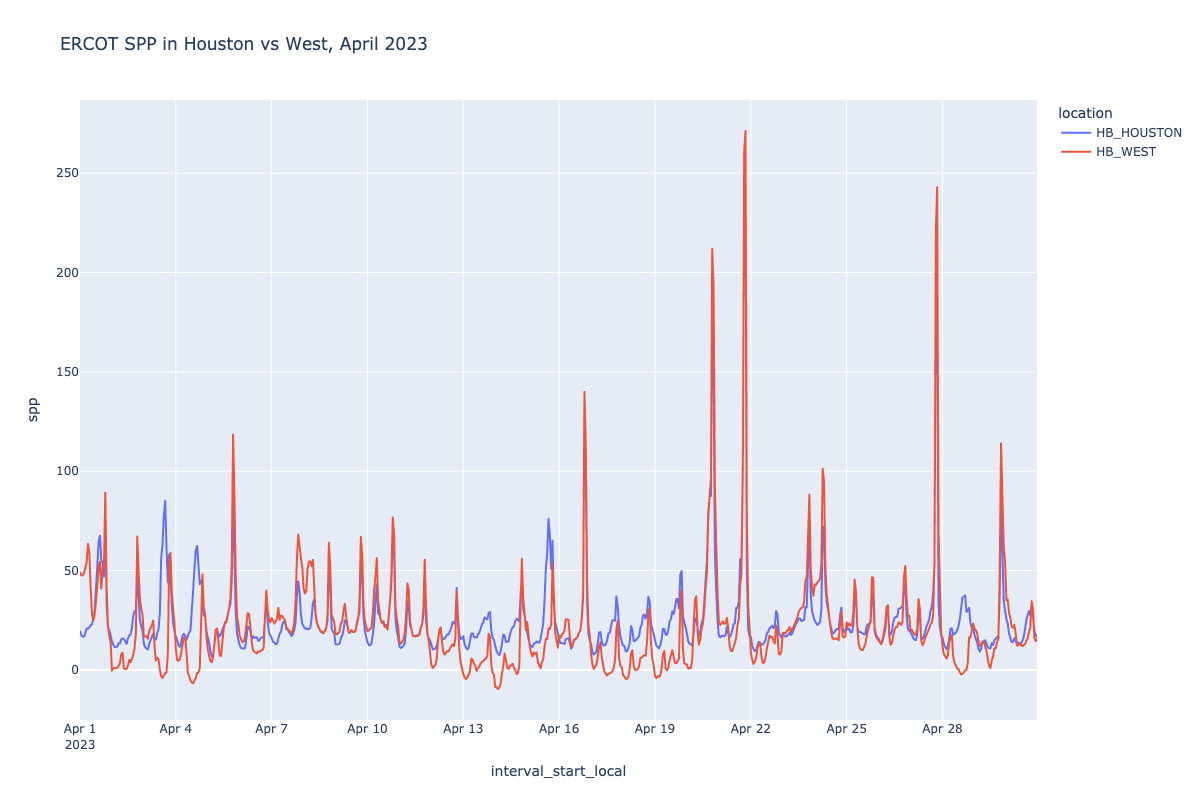

In [11]:
import plotly.express as px

fig = px.line(
    data_both_apr,
    x="interval_start_local",
    y="spp",
    color="location",
    title="ERCOT SPP in Houston vs West, April 2023",
)
fig.show("png", width=1200, height=800)

## Selecting Subset of Columns

We can select a subset of columns by passing a list of column names to the `columns` parameter. For example, if we want the output for a particular wind resource

In [12]:
big_star = client.get_dataset(
    dataset="ercot_sced_gen_resource_60_day",
    start="2023-04-02",
    end="2023-04-03",
    columns=[
        "interval_start_utc",
        "interval_end_utc",
        "resource_name",
        "resource_type",
        "telemetered_net_output",
    ],
    filter_column="resource_name",
    filter_operator="in",
    filter_value=["BIG_STAR_UNIT1", "BIG_STAR_UNIT2"],
    timezone="US/Central",
    limit=QUERY_LIMIT,
)

# Print out some data to see the column filter in action
big_star[
    (big_star["interval_start_local"].dt.hour >= 8)
    & (big_star["interval_start_local"].dt.hour < 16)
]

2026-01-10 19:44:11 - INFO - Fetching Page 1...
2026-01-10 19:44:11 - INFO - GET https://api.gridstatus.io/v1/datasets/ercot_sced_gen_resource_60_day/query
2026-01-10 19:44:11 - INFO - Params: {'start_time': Timestamp('2023-04-02 00:00:00'), 'end_time': Timestamp('2023-04-03 00:00:00'), 'publish_time_start': None, 'publish_time_end': None, 'limit': 10000, 'page': 1, 'page_size': None, 'resample_frequency': None, 'resample_by': None, 'resample_function': None, 'publish_time': None, 'timezone': 'US/Central', 'cursor': '', 'filter_column': 'resource_name', 'filter_value': 'BIG_STAR_UNIT1,BIG_STAR_UNIT2', 'filter_operator': 'in', 'columns': 'interval_start_utc,interval_end_utc,resource_name,resource_type,telemetered_net_output', 'return_format': 'json', 'json_schema': 'array-of-arrays'}
2026-01-10 19:44:11 - INFO - Done in 0.27 seconds. 
2026-01-10 19:44:11 - INFO - Total rows: 192/10,000 (1.92% of limit)
2026-01-10 19:44:11 - INFO - Total number of rows: 192


,interval_start_local,interval_start_utc,interval_end_local,interval_end_utc,resource_name,resource_type,telemetered_net_output
64,2023-04-02 08:00:00-05:00,2023-04-02 13:00:00+00:00,2023-04-02 08:15:00-05:00,2023-04-02 13:15:00+00:00,BIG_STAR_UNIT1,PVGR,0.4085
65,2023-04-02 08:00:00-05:00,2023-04-02 13:00:00+00:00,2023-04-02 08:15:00-05:00,2023-04-02 13:15:00+00:00,BIG_STAR_UNIT2,PVGR,0.2619
66,2023-04-02 08:15:00-05:00,2023-04-02 13:15:00+00:00,2023-04-02 08:30:00-05:00,2023-04-02 13:30:00+00:00,BIG_STAR_UNIT1,PVGR,2.3625
67,2023-04-02 08:15:00-05:00,2023-04-02 13:15:00+00:00,2023-04-02 08:30:00-05:00,2023-04-02 13:30:00+00:00,BIG_STAR_UNIT2,PVGR,1.8069
68,2023-04-02 08:30:00-05:00,2023-04-02 13:30:00+00:00,2023-04-02 08:45:00-05:00,2023-04-02 13:45:00+00:00,BIG_STAR_UNIT1,PVGR,1.6249
69,2023-04-02 08:30:00-05:00,2023-04-02 13:30:00+00:00,2023-04-02 08:45:00-05:00,2023-04-02 13:45:00+00:00,BIG_STAR_UNIT2,PVGR,1.1477
70,2023-04-02 08:45:00-05:00,2023-04-02 13:45:00+00:00,2023-04-02 09:00:00-05:00,2023-04-02 14:00:00+00:00,BIG_STAR_UNIT1,PVGR,2.1576
71,2023-04-02 08:45:00-05:00,2023-04-02 13:45:00+00:00,2023-04-02 09:00:00-05:00,2023-04-02 14:00:00+00:00,BIG_STAR_UNIT2,PVGR,1.6512
72,2023-04-02 09:00:00-05:00,2023-04-02 14:00:00+00:00,2023-04-02 09:15:00-05:00,2023-04-02 14:15:00+00:00,BIG_STAR_UNIT1,PVGR,2.1372
73,2023-04-02 09:00:00-05:00,2023-04-02 14:00:00+00:00,2023-04-02 09:15:00-05:00,2023-04-02 14:15:00+00:00,BIG_STAR_UNIT2,PVGR,1.6602


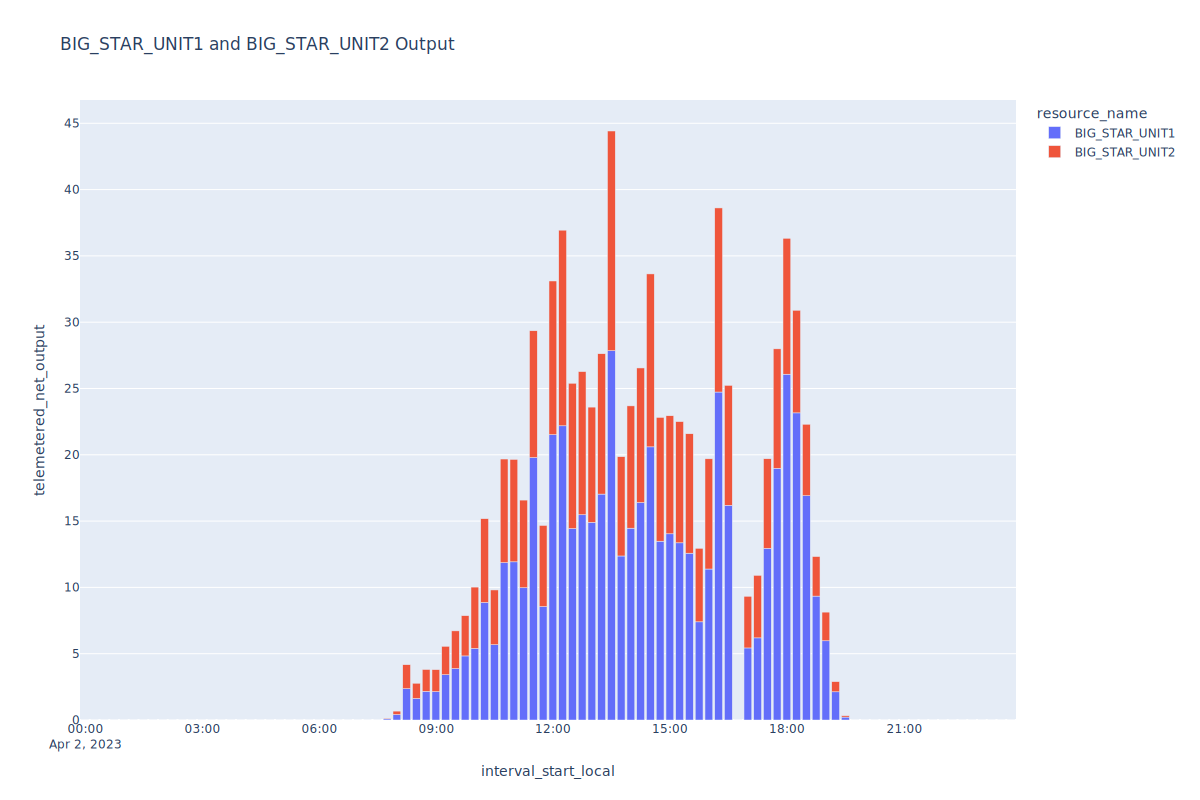

In [13]:
fig = px.bar(
    big_star,
    x="interval_start_local",
    y="telemetered_net_output",
    color="resource_name",
    title="BIG_STAR_UNIT1 and BIG_STAR_UNIT2 Output",
)

fig.show("svg", width=1200, height=800)

And it's that easy! Explore datasets, filter data, and visualize it all in a few lines of code using the gridstatusio client. Hop over to another example notebook to see more.